# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [37]:
from scipy import stats
dir(stats)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'crystalball',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'energy_dist

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [4]:
# Just making som data to play around with
lambda_heights = [72,72,77,72,73,67,64,58,63,78]

import pandas as pd
df = pd.DataFrame({'heights': lambda_heights})
df.head(10)

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [5]:
df.heights.mean()

69.6

In [22]:
# Making random data 0's and 1's
import random 
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [23]:
# Take a sample from the data randomly
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
100


In [24]:
df = pd.DataFrame({'likes_coke': sample})
df.head()

df.likes_coke.mean()

0.46

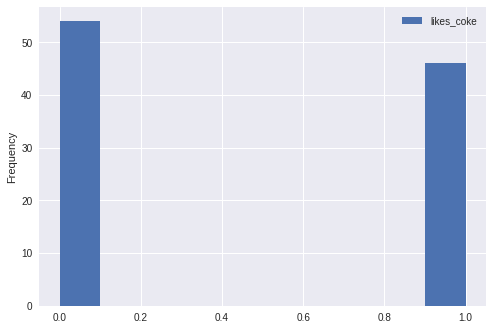

In [25]:
df.plot.hist()

In [27]:
df.likes_coke.describe()

count    100.000000
mean       0.460000
std        0.500908
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

In [28]:
import numpy as np

def mean(list):
  average = np.sum(list)/len(list)
  return average 

print('Population Mean:', mean(population))
print('Sample Mean:', mean(sample))

Population Mean: 0.507
Sample Mean: 0.46


In [30]:
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)

variance(df.likes_coke)

0.25090909090909086

In [33]:
def stddev(list):
  var = variance(list)
  return var**(1/2)

stddev(df.likes_coke)

0.5009082659620331

In [34]:
n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - .5)/(stddev(df.likes_coke)/n**(1/2))
print(t_stat)

-0.7985494095046901


In [42]:
import scipy
scipy.stats.ttest_1samp(df['likes_coke'], .5)

Ttest_1sampResult(statistic=-0.7985494095046901, pvalue=0.4264632540527489)

#P-Value
P-value is a threshold that we set for ourselves to denote "statistical significance" Statistical Significance means - the odds of me getting unlucky that I'm willing to deal with. The probability that I would have to see that says that these two differences are not just due to chance.

5% - Will only accept this result as reliable or significant if I calculate that this outcome has a 5% chance or less of happening just due to chance.

The probability that the pattern in our data that we're seeing could be produced by random data.

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [103]:
column_names = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing','adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid',
                'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
                'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=column_names, na_values='?')
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
df = df.fillna(-1)

In [0]:
for column in df.columns:
  df[column] = df[column].replace({'n':0, 'y':1})

  

In [106]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
2,democrat,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1


In [0]:
rep = df[df['Class Name']=='republican']
dem= df[df['Class Name']=='democrat']

In [108]:
rep.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,-1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,-1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,-1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,republican,0,1,0,1,1,0,0,0,0,0,-1,-1,1,1,0,0


In [109]:
dem.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,-1,1,1,-1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,-1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,-1,1,1,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,-1,1,1,1


In [112]:
for column in rep.columns:
  print(rep[column].value_counts(normalize=True),'\n#####################################################\n')

republican    1.0
Name: Class Name, dtype: float64 
#####################################################

 0    0.797619
 1    0.184524
-1    0.017857
Name: handicapped-infants, dtype: float64 
#####################################################

 1    0.446429
 0    0.434524
-1    0.119048
Name: water-project-cost-sharing, dtype: float64 
#####################################################

 0    0.845238
 1    0.130952
-1    0.023810
Name: adoption-of-the-budget-resolution, dtype: float64 
#####################################################

 1    0.970238
-1    0.017857
 0    0.011905
Name: physician-fee-freeze, dtype: float64 
#####################################################

 1    0.934524
 0    0.047619
-1    0.017857
Name: el-salvador-aid, dtype: float64 
#####################################################

 1    0.886905
 0    0.101190
-1    0.011905
Name: religious-groups-in-schools, dtype: float64 
#####################################################

 0    0.7

In [113]:
for column in dem.columns:
  print(dem[column].value_counts(normalize=True),'\n#####################################################\n')

democrat    1.0
Name: Class Name, dtype: float64 
#####################################################

 1    0.584270
 0    0.382022
-1    0.033708
Name: handicapped-infants, dtype: float64 
#####################################################

 1    0.449438
 0    0.445693
-1    0.104869
Name: water-project-cost-sharing, dtype: float64 
#####################################################

 1    0.865169
 0    0.108614
-1    0.026217
Name: adoption-of-the-budget-resolution, dtype: float64 
#####################################################

 0    0.917603
 1    0.052434
-1    0.029963
Name: physician-fee-freeze, dtype: float64 
#####################################################

 0    0.749064
 1    0.205993
-1    0.044944
Name: el-salvador-aid, dtype: float64 
#####################################################

 0    0.505618
 1    0.460674
-1    0.033708
Name: religious-groups-in-schools, dtype: float64 
#####################################################

 1    0.749

In [119]:
print('All Mean:', mean(dem['handicapped-infants']))
print('Sample Mean:', mean(dem['handicapped-infants']))
scipy.stats.ttest_1samp(dem['handicapped-infants'], .5)

All Mean: 0.550561797752809
Sample Mean: 0.550561797752809


Ttest_1sampResult(statistic=1.4696201823440125, pvalue=0.14284638421776033)

In [118]:
print('All Mean:', mean(rep['handicapped-infants']))
print('Sample Mean:', mean(rep['handicapped-infants']))
scipy.stats.ttest_1samp(rep['handicapped-infants'], .5)

All Mean: 0.16666666666666666
Sample Mean: 0.16666666666666666


Ttest_1sampResult(statistic=-10.308866439755986, pvalue=1.3555151559007748e-19)

In [0]:
rep_nonan = rep[rep['handicapped-infants']!=-1]
dem_nonan = dem[dem['handicapped-infants']!=-1]

In [122]:
scipy.stats.ttest_1samp(dem_nonan['handicapped-infants'], .5)

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.0006996123171673836)

In [123]:
scipy.stats.ttest_1samp(rep_nonan['handicapped-infants'], .5)

Ttest_1sampResult(statistic=-10.232833482397659, pvalue=2.572179359890005e-19)

Democrats support Handicapped Infants more than Republicans

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars